Enter Radius(R):4
Enter width(w):1
Enter Resolution(n):200
Surface Area ≈ 0.004030
Edge Length ≈ 1.000000


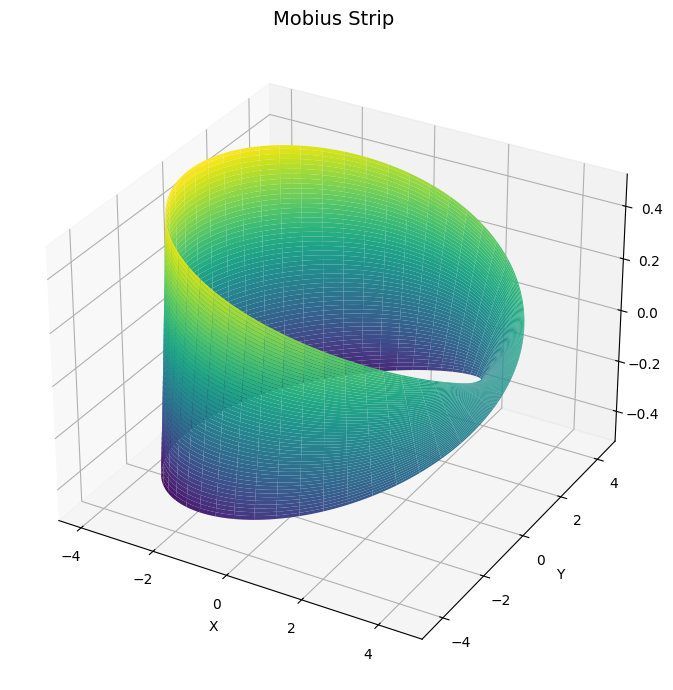

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class MobiusStrip:
    def __init__(self, R=1, w=0.2, n=200):
        """
        Initialize the Mobius strip parameters.
        :param R: Radius from center to strip
        :param w: Width of the strip
        :param n: Resolution of the grid
        """
        self.R = R
        self.w = w
        self.n = n

        # Create parameter grid: u ∈ [0, 2π], v ∈ [−w/2, w/2]
        self.u, self.v = np.meshgrid(
            np.linspace(0, 2 * np.pi, self.n),
            np.linspace(-w / 2, w / 2, self.n)
        )

        # Compute 3D coordinates of the Mobius strip
        self.x, self.y, self.z = self._compute_coordinates()

    def _compute_coordinates(self):
        """
        Apply the parametric equations to compute (x, y, z).
        """
        u = self.u
        v = self.v
        x = (self.R + v * np.cos(u / 2)) * np.cos(u)
        y = (self.R + v * np.cos(u / 2)) * np.sin(u)
        z = v * np.sin(u / 2)
        return x, y, z

    def surface_area(self):
        """
        Approximate surface area using cross product of partial derivatives.
        """
        du = 2 * np.pi / (self.n - 1)
        dv = self.w / (self.n - 1)

        # Partial derivatives w.r.t. u and v
        xu = np.gradient(self.x, axis=0)
        xv = np.gradient(self.x, axis=1)
        yu = np.gradient(self.y, axis=0)
        yv = np.gradient(self.y, axis=1)
        zu = np.gradient(self.z, axis=0)
        zv = np.gradient(self.z, axis=1)

        # Cross product
        cx = yu * zv - zu * yv
        cy = zu * xv - xu * zv
        cz = xu * yv - yu * xv

        # Element-wise area
        dA = np.sqrt(cx**2 + cy**2 + cz**2)

        # Total surface area
        return np.sum(dA) * du * dv

    def edge_length(self):
        """
        Compute the length of the boundary (edge) numerically.
        """
        # Use edge at v = w/2
        x_edge = self.x[:, -1]
        y_edge = self.y[:, -1]
        z_edge = self.z[:, -1]

        # Differences between consecutive points
        dx = np.diff(x_edge)
        dy = np.diff(y_edge)
        dz = np.diff(z_edge)

        # Total length
        lengths = np.sqrt(dx**2 + dy**2 + dz**2)
        return np.sum(lengths)

    def plot(self):
        """
        Plot the Mobius strip using matplotlib.
        """
        fig = plt.figure(figsize=(10, 7))
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_surface(self.x, self.y, self.z, cmap='viridis', edgecolor='none')
        ax.set_title("Mobius Strip", fontsize=14)
        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        ax.set_zlabel("Z")
        plt.tight_layout()
        plt.show()


# --------------------
# Run and Demonstrate
# --------------------

if __name__ == "__main__":
    # Create a Mobius strip
    R=int(input("Enter Radius(R):"))
    w=int(input("Enter width(w):"))
    n=int(input("Enter Resolution(n):"))
    mobius = MobiusStrip(R, w, n)

    # Compute geometric properties
    area = mobius.surface_area()
    edge = mobius.edge_length()

    # Output results
    print(f"Surface Area ≈ {area:.6f}")
    print(f"Edge Length ≈ {edge:.6f}")

    # Plot the strip
    mobius.plot()
